In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from __future__ import print_function
from __future__ import division

import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.compat.v1.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.8 #最多使用80%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

Using TensorFlow backend.


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import os
import csv
from PIL import Image
from cv2 import cv2
import random

In [ ]:
# categorical_crossentropy
#def load_data(): 
x_train = []
y_train = []
x_test = []
y_test = []
size = (168,126)
i = 1
#with open(r'/content/drive/My Drive/C1-P1_Train Dev_fixed/train.csv', newline='') as csvFile:
#with open(r'/content/drive/My Drive/C1-P1_Train Dev_fixed_s/train.csv', newline='') as csvFile:
with open(r'/content/drive/My Drive/C1-P1_Train/train.csv', newline='') as csvFile:
    rows = csv.reader(csvFile)
    rows = csv.reader(csvFile, delimiter=',')
    for row in rows:
        if(row[1]!='label'):
            if(row[1]=='A'):
                label = 0
            elif(row[1]=='B'):
                label = 1
            elif(row[1]=='C'):
                label = 2
            #img = Image.open(os.path.join('/content/drive/My Drive/C1-P1_Train Dev_fixed/C1-P1_Train', row[0]))
            img = Image.open(os.path.join('/content/drive/My Drive/C1-P1_Train', row[0]))
            img = img.resize(size,Image.BILINEAR)
            imgarray = np.array(img)
            imgarray = (imgarray - np.min(imgarray))/(np.max(imgarray)-np.min(imgarray))
            x_train.append(imgarray)
            y_train.append(label)
            print(i,row[0],row[1])
            i = i + 1
j = 1
with open(r'/content/drive/My Drive/C1-P1_Train Dev_fixed/dev.csv', newline='') as csvFile:
#with open(r'/content/drive/My Drive/C1-P1_Train Dev_fixed_s/dev.csv', newline='') as csvFile:
    rows = csv.reader(csvFile)
    rows = csv.reader(csvFile, delimiter=',')
    for row in rows:
        if(row[1]!='label'):
            if(row[1]=='A'):
                label = 0
            elif(row[1]=='B'):
                label = 1
            elif(row[1]=='C'):
                label = 2
            img = Image.open(os.path.join('/content/drive/My Drive/C1-P1_Train Dev_fixed/C1-P1_Dev', row[0]))
            img = img.resize(size,Image.BILINEAR)
            imgarray = np.array(img)
            imgarray = (imgarray - np.min(imgarray))/(np.max(imgarray)-np.min(imgarray))
            x_test.append(imgarray)
            y_test.append(label)
            print(j,row[0],row[1])
            j = j + 1
            
# convert class vectors to binary class matrices
temp = list(zip(x_train, y_train))
random.shuffle(temp)
x_train, y_train = zip(*temp)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)

print('data loaded')

Streaming output truncated to the last 5000 lines.
1475 02127.jpg A
1476 02128.jpg B
1477 02129.jpg B
1478 02130.jpg C
1479 02131.jpg B
1480 02132.jpg C
1481 02134.jpg A
1482 02137.jpg A
1483 02139.jpg C
1484 02140.jpg C
1485 02142.jpg A
1486 02144.jpg B
1487 02145.jpg A
1488 02146.jpg C
1489 02148.jpg B
1490 02149.jpg C
1491 02151.jpg C
1492 02152.jpg A
1493 02153.jpg A
1494 02154.jpg A
1495 02155.jpg A
1496 02156.jpg B
1497 02158.jpg A
1498 02159.jpg B
1499 02160.jpg C
1500 02161.jpg B
1501 02162.jpg B
1502 02163.jpg A
1503 02164.jpg B
1504 02165.jpg B
1505 02166.jpg A
1506 02167.jpg B
1507 02169.jpg A
1508 02170.jpg A
1509 02171.jpg C
1510 02174.jpg A
1511 02177.jpg A
1512 02178.jpg A
1513 02180.jpg A
1514 02183.jpg B
1515 02184.jpg A
1516 02185.jpg B
1517 02190.jpg B
1518 02191.jpg C
1519 02192.jpg A
1520 02193.jpg B
1521 02194.jpg C
1522 02195.jpg A
1523 02196.jpg A
1524 02198.jpg A
1525 02199.jpg A
1526 02200.jpg B
1527 02201.jpg C
1528 02203.jpg C
1529 02204.jpg B
1530 02205.jpg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
train_data_gen = datagen.flow(x_train, y_train, batch_size=100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.engine import training
from typing import Tuple
import time
EStop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                      patience=10, verbose=1, mode='auto')
optimizer = RMSprop(lr=1e-4)

In [ ]:
# Generate model
###
#alexnet
###
model_alexnet = Sequential()
model_alexnet.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(126,168,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model_alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_alexnet.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model_alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_alexnet.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model_alexnet.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model_alexnet.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model_alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model_alexnet.add(Flatten())
model_alexnet.add(Dense(4096,activation='relu'))
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(4096,activation='relu'))
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(3,activation='softmax'))
model_alexnet.summary()
#alexnet_history = compile_and_train(model_alexnet, NUM_EPOCHS)
#alexnet_history = compile_and_train(model_alexnet, NUM_EPOCHS)
model_alexnet.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 40, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 19, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 19, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 9, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 9, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 9, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 9, 256)        

In [ ]:
# Training and saving
total_train = 5600
total_val = 800 

history_a = model_alexnet.fit_generator(
    train_data_gen,
    steps_per_epoch=64,
    epochs=100,
    callbacks=[EStop],
    validation_data=(x_test, y_test)
)
timestr = time.strftime("%Y%m%d_%H%M%S")
model_alexnet.save('model_alexnet_{}.h5'.format(timestr))

Epoch 1/100
64/64 [==============================] - 37s 583ms/step - loss: 1.1181 - accuracy: 0.4151 - val_loss: 1.0176 - val_accuracy: 0.4925
Epoch 2/100
64/64 [==============================] - 34s 526ms/step - loss: 1.0116 - accuracy: 0.4835 - val_loss: 0.9250 - val_accuracy: 0.5362
Epoch 3/100
64/64 [==============================] - 34s 527ms/step - loss: 0.9567 - accuracy: 0.5210 - val_loss: 0.8710 - val_accuracy: 0.5863
Epoch 4/100
64/64 [==============================] - 34s 528ms/step - loss: 0.9190 - accuracy: 0.5524 - val_loss: 0.8838 - val_accuracy: 0.5688
Epoch 5/100
64/64 [==============================] - 34s 529ms/step - loss: 0.9022 - accuracy: 0.5606 - val_loss: 0.8976 - val_accuracy: 0.5612
Epoch 6/100
64/64 [==============================] - 34s 526ms/step - loss: 0.8799 - accuracy: 0.5824 - val_loss: 0.8626 - val_accuracy: 0.5850
Epoch 7/100
64/64 [==============================] - 34s 530ms/step - loss: 0.8471 - accuracy: 0.6023 - val_loss: 0.7869 - val_accuracy:

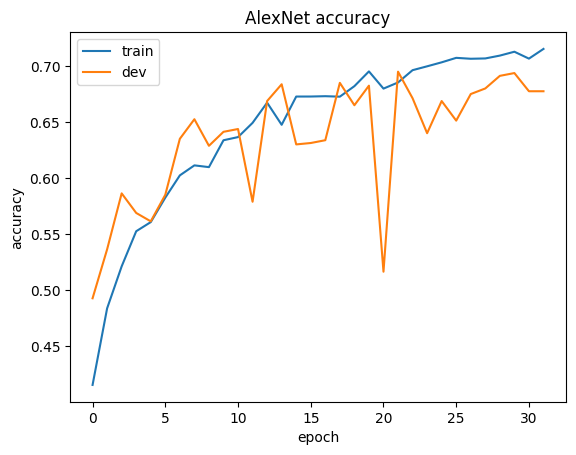

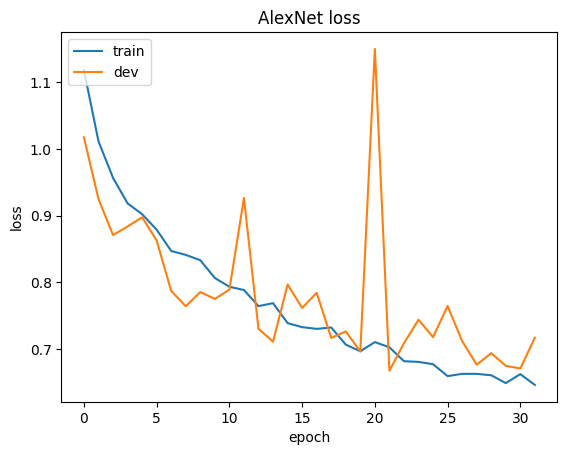

In [ ]:
# Training History
import collections
import pandas as pd
hist_a = history_a.history

for key, val in hist_a.items(): # Count the number of epoch
    numepo = len(np.asarray(val))
    break

import matplotlib.pyplot as plt

plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('AlexNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.savefig('Model_a accuracy_{}.png'.format(timestr))
plt.show()
plt.cla()

plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('AlexNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.savefig('Model_a loss_{}.png'.format(timestr))
plt.show()
plt.close()

Normalized confusion matrix
[[0.64 0.24 0.12]
 [0.15 0.53 0.32]
 [0.05 0.08 0.87]]


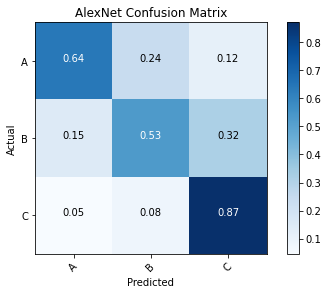

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model

def plot_confusion_matrix(cm, classes_x,classes_y,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.clf()
    plt.cla()
    plt.style.use('default')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title(title)
    plt.colorbar()
    tick_marks_x = np.arange(len(classes_x))
    tick_marks_y = np.arange(len(classes_y))
    plt.xticks(tick_marks_x, classes_x, rotation=45)
    plt.yticks(tick_marks_y, classes_y)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(title+'.png',dpi=350 ,bbox_inches='tight')
    plt.show()
    plt.close()

test_pred_a  = model_alexnet.predict(x_test)
cnf_matrix_a = confusion_matrix(np.argmax(y_test, axis=1).reshape(-1,1),
                              np.argmax(test_pred_a, axis=1).reshape(-1,1))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_a,['A','B','C'],['A','B','C'],normalize=True,title='AlexNet Confusion Matrix')